Drone 1 flying to location (10, 20)
Drone 1 collecting data at location (10, 20)
Data collected by Drone 1: {'temperature': 29, 'humidity': 61, 'pollution_level': 58}

Drone 2 flying to location (10, 20)
Drone 2 collecting data at location (10, 20)
Data collected by Drone 2: {'temperature': 19, 'humidity': 76, 'pollution_level': 44}

Drone 3 flying to location (10, 20)
Drone 3 collecting data at location (10, 20)
Data collected by Drone 3: {'temperature': 17, 'humidity': 76, 'pollution_level': 51}

Drone 1 flying to location (30, 40)
Drone 1 collecting data at location (30, 40)
Data collected by Drone 1: {'temperature': 15, 'humidity': 63, 'pollution_level': 72}

Drone 2 flying to location (30, 40)
Drone 2 collecting data at location (30, 40)
Data collected by Drone 2: {'temperature': 22, 'humidity': 45, 'pollution_level': 38}

Drone 3 flying to location (30, 40)
Drone 3 collecting data at location (30, 40)
Data collected by Drone 3: {'temperature': 10, 'humidity': 41, 'pollution_level

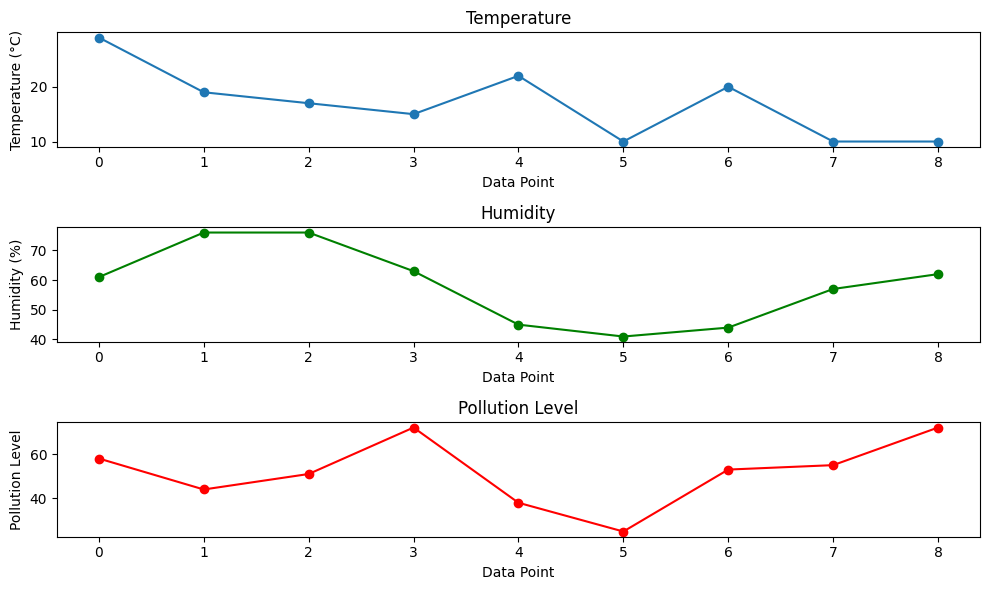

In [1]:
import time
import random
import matplotlib.pyplot as plt

class Drone:
    def __init__(self, drone_id):
        self.id = drone_id
        self.battery = 100
        self.location = (0, 0)

    def fly_to_location(self, location):
        print(f"Drone {self.id} flying to location {location}")
        time.sleep(2)  # Simulate flight time
        self.location = location
        self.battery -= 1

    def collect_data(self):
        print(f"Drone {self.id} collecting data at location {self.location}")
        time.sleep(3)  # Simulate data collection time
        # Simulate data
        temperature = random.randint(10, 30)
        humidity = random.randint(30, 80)
        pollution_level = random.randint(0, 100)
        return {
            'temperature': temperature,
            'humidity': humidity,
            'pollution_level': pollution_level
        }

    def recharge_battery(self):
        print(f"Drone {self.id} recharging battery...")
        time.sleep(5)  # Simulate charging time
        self.battery = 100
        print(f"Drone {self.id} battery recharged to 100%")

class TreeMonitoringSystem:
    def __init__(self, num_drones):
        self.drones = [Drone(i+1) for i in range(num_drones)]
        self.data_collected = []

    def monitor_trees(self, tree_locations):
        for location in tree_locations:
            for drone in self.drones:
                if drone.battery < 10:
                    drone.recharge_battery()
                drone.fly_to_location(location)
                data = drone.collect_data()
                self.data_collected.append(data)
                print(f"Data collected by Drone {drone.id}: {data}")
                print("")

    def visualize_data(self):
        temperatures = [data['temperature'] for data in self.data_collected]
        humidities = [data['humidity'] for data in self.data_collected]
        pollution_levels = [data['pollution_level'] for data in self.data_collected]

        plt.figure(figsize=(10, 6))

        plt.subplot(3, 1, 1)
        plt.plot(temperatures, marker='o')
        plt.title('Temperature')
        plt.xlabel('Data Point')
        plt.ylabel('Temperature (°C)')

        plt.subplot(3, 1, 2)
        plt.plot(humidities, marker='o', color='g')
        plt.title('Humidity')
        plt.xlabel('Data Point')
        plt.ylabel('Humidity (%)')

        plt.subplot(3, 1, 3)
        plt.plot(pollution_levels, marker='o', color='r')
        plt.title('Pollution Level')
        plt.xlabel('Data Point')
        plt.ylabel('Pollution Level')

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    num_drones = 3
    tree_locations = [(10, 20), (30, 40), (50, 60)]  # Example tree locations

    monitoring_system = TreeMonitoringSystem(num_drones)
    monitoring_system.monitor_trees(tree_locations)
    monitoring_system.visualize_data()
